In [1]:
import pandas as pd
import plotly.graph_objects as go
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data['Geography'] = churn_data['Geography'].astype('category')
churn_data['Gender'] = churn_data['Gender'].astype('category')
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 'Yes' if x ==1 else 'No')
churn_data['HasCrCard'] = churn_data['HasCrCard'].apply(lambda x: 'Yes' if x ==1 else 'No')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(7), object(1)
memory usage: 820.9+ KB


1. Каково соотношение ушедших и лояльных клиентов?

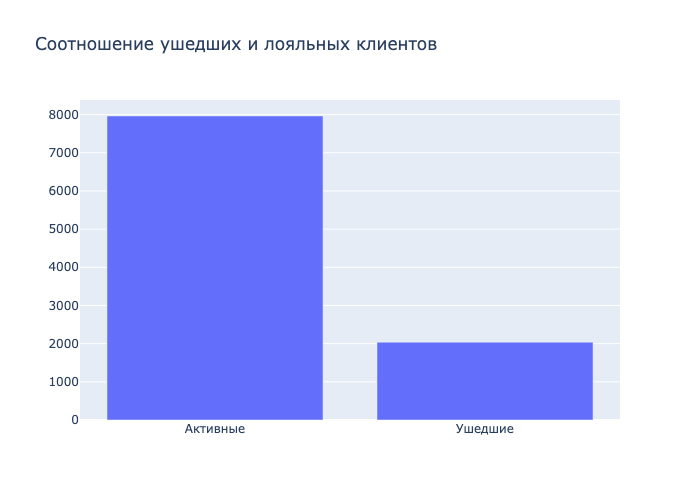

In [2]:
exited_compare = churn_data.groupby('Exited')['Exited'].count()
fig = go.Figure(layout_title_text="Соотношение ушедших и лояльных клиентов")
fig.add_trace(go.Bar(y=exited_compare,x=('Активные','Ушедшие')))
fig.show("png")

Ушедших пользователей в ~4 раза меньше чем активных (7963/2037) Потенциально уходит каждый 5 клиент

2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

In [ ]:
over_2500_balans = churn_data[churn_data['Balance']>=2500]['Balance']

fig = go.Figure()
fig.add_trace(go.Histogram(x=over_2500_balans, ))
fig.show()

In [ ]:
over_2500_balans.describe()

На счетах с балансом более 2500, в основном, хранится от 100 000 до 140 000 c нормальным распределением, без явных выбросов. Максимальная сумма - 250 000

3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [ ]:
exited_balans = churn_data[churn_data['Exited']==1]['Balance']
customer_balans  = churn_data[churn_data['Exited']==0]['Balance']

fig = go.Figure(layout_title_text="Логарифмическое сравнение балансов 'активных' и 'ушедших' клиентов")
fig.add_trace(go.Histogram(x=exited_balans,name='Ушедшие', marker_color='#ff668c'))
fig.add_trace(go.Histogram(x=customer_balans,name='Активные', marker_color='#6666ff'))
fig.update_yaxes(type="log", range=[0,4]) 
fig.show()


Никаких особых отличий между балансами ушедших и активных клиентов нет, обе группы имеют нормальное распределение, наблюдается очень большое колиечество клиентов с нулевым балансом в обеих группах

4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [ ]:
exited_Age = churn_data[churn_data['Exited']==1]['Age']
customer_Age  = churn_data[churn_data['Exited']==0]['Age']

fig = go.Figure(layout_title_text="Логарифмическое распределение пользователей по возрасту среди'активных' и 'ушедших' клиентов")
fig.add_trace(go.Histogram(x=exited_Age,name='Ушедшие', marker_color='#ff668c'))
fig.add_trace(go.Histogram(x=customer_Age,name='Активные', marker_color='#6666ff'))
fig.update_yaxes(type="log", range=[0,4]) 
fig.show()


Основные активные клиенты в возрасет от 22 до 46 лет, и более 70 лет. Возраст ушедших клиентов смещен в сторону 35-60 лет. Меньше всего уходит клиентов в возрасте до 28 лет и более 61. Наблюдаются сильные выбросы, 22 и 24 года, среди ушедших, возможно связано с окончанием обучения и началом работы. Так же сильный всплеск наблюдается 70-71 год, это скорей всего связано с средней продолжительностью жизни. 

5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [ ]:
exited = churn_data[churn_data['Exited']==1]
customer = churn_data[churn_data['Exited']==0]


fig = go.Figure(layout_title_text="Зависимость кредитного рейтинга и предпологаемой зарплаты среди 'активных' и 'ушедших' клиентов")
fig.add_trace(go.Scatter(mode="markers", y=customer['CreditScore'], x=customer['EstimatedSalary'],name='Активные', marker_color='#6666ff'))
fig.add_trace(go.Scatter(mode="markers", y=exited['CreditScore'], x=exited['EstimatedSalary'],name='Ушедшие', marker_color='#ff668c'))
fig.update_xaxes(type="log", range=[2,5.4]) 

fig.show()

Для ушедших клиентов размер предпологаемой зарплаты не зависит от "активности" пользователя, в то время как для ушедших пользователей кредитный рейтинг чуть ниже.

6. Кто чаще уходит, мужчины или женщины?

In [ ]:
gender_exited = churn_data.groupby('Gender', as_index=False)['Exited'].mean()

fig = go.Figure(layout_title_text="Соотношение ушедших и лояльных клиентов в разрезе пола")

fig.add_trace(go.Bar(x=gender_exited['Gender'],y=gender_exited['Exited']))

fig.show()


Чаще уходят мужчины (25% мужчины / 16% женщины)

7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
exited = churn_data[churn_data['Exited']==1]
customer = churn_data[churn_data['Exited']==0]

NumOfProducts_Exited = exited.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
NumOfProducts_Customer = customer.groupby(['NumOfProducts', 'Exited'], as_index=False).count()

fig = go.Figure(layout_title_text="Соотношение ушедших и лольяных клиентов в зависимости от числа услуг")
x = list(range(1,churn_data['NumOfProducts'].nunique()+1))

fig.add_trace(go.Bar(x=x,y=NumOfProducts_Customer['RowNumber'],name='Активные', marker_color='#6666ff'))
fig.add_trace(go.Bar(x=x,y=NumOfProducts_Exited['RowNumber'],name='Ушедшие', marker_color='#ff668c'))

fig.update_layout(barmode="relative")

fig.show()


Меньше всего уходят пользователи которые пользуются 2мя услугами, те кто пользуется 3 и 4 услугами уходят чаще всего. Стоит уделить внимание пользователям которые имеют только 1 активный продукт и предлагать им дополнительную услугу

8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
IsActiveMember_exited = churn_data.groupby(['IsActiveMember','Exited'], as_index=False).count()

exited = churn_data[churn_data['Exited']==1]
customer = churn_data[churn_data['Exited']==0]

IsActiveMember_Exited = exited.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
IsActiveMember_Customer = customer.groupby(['IsActiveMember', 'Exited'], as_index=False).count()

fig = go.Figure(layout_title_text="Соотношение ушедших и лольяных клиентов в зависимости от статуса активности")
fig.add_trace(go.Bar(x=IsActiveMember_Customer['IsActiveMember'],y=IsActiveMember_Customer['RowNumber'],name='Активные', marker_color='#6666ff'))
fig.add_trace(go.Bar(x=IsActiveMember_Exited['IsActiveMember'],y=IsActiveMember_Exited['RowNumber'],name='Ушедшие', marker_color='#ff668c'))

fig.update_layout(barmode="relative")

fig.show()


Неактивные клиенты чаще уходят. Возможно стоит разработать меры по увеличению активности (бонусы или же "ачивки" за активность)

9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
Geography = churn_data.groupby(['Geography'],as_index=False).mean()
fig = go.Figure(layout_title_text="Отток клиентов по странам")
fig.add_trace(go.Choropleth(
    z = Geography['Exited'],
    locationmode="country names",
    locations = Geography['Geography'],
    ))
fig.show()


Наибольший отток наблюдается в Германии (32%). Для Испании и Франции процент оттока одинаковый(~16%)), скорей всего связано или с особыми условиями для жителей этой страны или внутренние особености страны.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScore'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')


In [ ]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScore'
)
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

fig = go.Figure(layout_title_text="Вероятность оттока на основании кредитного рейтинга и срока обслуживания", data=go.Heatmap(df_to_plotly(pivot)))
fig.show()

Чаще всего уходят пользователи с самым низким кредитным рейтингом. Максимальнй отток в первый год обслуживания, далее идёт 10 год обслуживания с самым низким рейтингом. 
Так же чаещ обычного уходят пользователи с самым высоким рейтингом в первый год обслуживания и после 8 лет сотрудничества.
Пользователи с рейтингами "Poor","Good","Fair" наиболее лояльны, и с повышением срока обслуживания - лояльность растёт.
Наблюдаются аномально низкие проценты отказов для "Very_Poor" пользователей на 2 и 5 года обслуживания, похожая аномалия есть для "Excellent" на 2,4 и 7 годах обслуживания